In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import iqr, norm
np.random.seed(432)

In [2]:
df_m =  pd.read_csv('data/monthly_data.csv', delimiter=';')
df_m.index = pd.to_datetime(df_m.month, format='%d/%m/%Y')
df_m = df_m.drop("month", axis = 1)

In [3]:
df_m['v_cpi'] = df_m.cpi.pct_change(12)*100
df_m['vol_cpi1'] = df_m.v_cpi.rolling(12).std()
df_m['v_cpi_usa'] = df_m.cpi_usa.pct_change(12)*100
df_m['output'] = df_m.imae_tc.pct_change(12)*100
df_m['v_ner_gt'] = df_m.ner_gt.pct_change(12)*100
df_m.tail()

,cpi,cpi_usa,i_pm,ner_gt,pce_us,pce_us_core,imae_tc,v_cpi_core,target,v_cpi,vol_cpi1,v_cpi_usa,output,v_ner_gt
month,,,,,,,,,,,,,,
2021-12-01,153.202627,278.802,1.75,7.725414,5.78239,4.88934,133.179394,3.20,4.0,3.069582,1.139687,7.036403,4.718323,-0.971701
2022-01-01,153.140000,281.148,1.75,7.702853,6.01492,5.15399,133.816719,3.29,4.0,2.868274,1.163867,7.479872,4.797547,-1.119577
2022-02-01,153.790000,283.716,1.75,7.698491,6.27492,5.31423,134.577955,3.37,4.0,2.979778,1.031222,7.871064,4.743757,-0.605141
2022-03-01,156.090000,287.504,1.75,7.694115,6.59103,5.17927,135.301481,3.47,4.0,4.171116,0.828051,8.542456,4.412335,-0.339531
2022-04-01,156.930000,289.109,1.75,7.662973,NaN,NaN,135.884581,3.71,4.0,4.620000,0.744063,8.258629,3.881009,-0.694690


In [4]:
# DataFrame with Pre-Inflation Targetin dates
pre_df = df_m.loc['1995-01-01':'2004-12-01']
pre_df.tail()

,cpi,cpi_usa,i_pm,ner_gt,pce_us,pce_us_core,imae_tc,v_cpi_core,target,v_cpi,vol_cpi1,v_cpi_usa,output,v_ner_gt
month,,,,,,,,,,,,,,
2004-08-01,67.354899,189.5,2.41,7.91,2.39245,1.90017,72.760766,5.618136,5.0,7.655860,0.745216,2.654388,3.355739,-0.126263
2004-09-01,67.880175,189.9,2.08,7.90,2.27273,1.94801,73.071968,5.892911,5.0,8.046358,0.798635,2.537797,3.599758,-1.002506
2004-10-01,68.545871,190.9,2.07,7.83,2.69967,1.98312,73.327429,6.232500,5.0,8.638312,0.903774,3.189189,3.851406,-3.333333
2004-11-01,69.227169,191.0,2.43,7.77,2.96503,2.06234,73.519009,6.531996,5.0,9.222942,1.026777,3.523035,4.107814,-3.836634
2004-12-01,69.632827,190.3,2.68,7.78,2.79375,2.06560,73.725408,6.665837,5.0,9.226628,1.060653,3.255562,4.349838,-3.113325


In [5]:
# DataFrame with Inflation Targetin dates
it_df = df_m.loc['2005-01-01':'2021-12-01']
it_df.tail()

,cpi,cpi_usa,i_pm,ner_gt,pce_us,pce_us_core,imae_tc,v_cpi_core,target,v_cpi,vol_cpi1,v_cpi_usa,output,v_ner_gt
month,,,,,,,,,,,,,,
2021-08-01,151.330000,273.567,1.75,7.738385,4.23707,3.59916,132.292072,3.18,4.0,3.615200,0.779375,5.251272,8.241578,0.430870
2021-09-01,151.650000,274.310,1.75,7.731864,4.43635,3.70276,132.229078,3.30,4.0,3.671042,0.862090,5.390349,6.196225,-0.326673
2021-10-01,152.200000,276.589,1.75,7.731476,5.05838,4.18620,132.399429,3.17,4.0,2.956098,1.000007,6.221869,5.126360,-0.641028
2021-11-01,152.940000,277.948,1.75,7.731369,5.64988,4.68660,132.722224,3.11,4.0,2.885974,1.081137,6.809003,4.758802,-0.738335
2021-12-01,153.202627,278.802,1.75,7.725414,5.78239,4.88934,133.179394,3.20,4.0,3.069582,1.139687,7.036403,4.718323,-0.971701


In [6]:
# inflation means
mean_all = df_m.v_cpi.mean()
vol_all = df_m.vol_cpi1.mean()
median_all = df_m.v_cpi.median()
pre_mean = pre_df.v_cpi.mean()
pre_vol = pre_df.vol_cpi1.mean()
it_mean = it_df.v_cpi.mean()
it_vol = it_df.vol_cpi1.mean()
print('1995 - 2021:', mean_all, vol_all)
print('1995 - 2004:', pre_mean, pre_vol)
print('2005 - 2021:', it_mean, it_vol)

1995 - 2021: 5.75867505855973 1.1204665534340115
1995 - 2004: 7.419621736283667 1.1440284661700635
2005 - 2021: 4.920504917193716 1.1127663463465784


In [7]:
# pd.to_datetime(df_m.index[20])
x0 = (df_m.index.get_loc('1996-01-01'))/len(df_m.index)
x1 = (df_m.index.get_loc('2004-12-01'))/len(df_m.index)
x2 = (df_m.index.get_loc('2005-01-01'))/len(df_m.index)
x3 = (df_m.index.get_loc('2021-12-01'))/len(df_m.index)

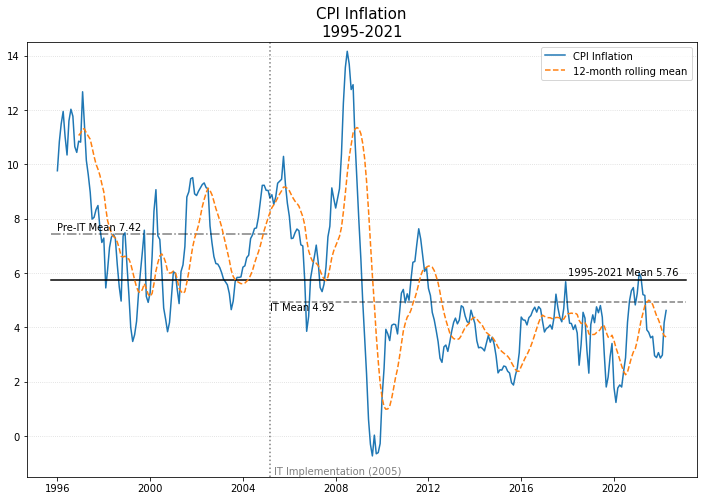

In [8]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation\n1995-2021', fontsize=15)
plt.plot(df_m.v_cpi, label='CPI Inflation')
plt.ylim([-1.5, 14.5]) 
plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=pre_mean, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=it_mean, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2005-03-01'), color='k', linestyle=':', alpha=0.5)
plt.plot(df_m.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),-1.4, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1996-01-01'),pre_mean+0.15, 'Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)), fontsize=10)
plt.text(pd.to_datetime('2005-03-01'),it_mean-0.3, 'IT Mean {:.2f}'.format(np.mean(it_mean)), fontsize=10)
plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

In [9]:
# plt.figure(figsize=(12,8))
# sns.histplot(df_m.v_cpi, bins=20, color='k', alpha=0.5)
# plt.axvline(x=mean_all, color='r', linestyle='-')
# plt.axvline(x=median_all, color='g', linestyle='-')

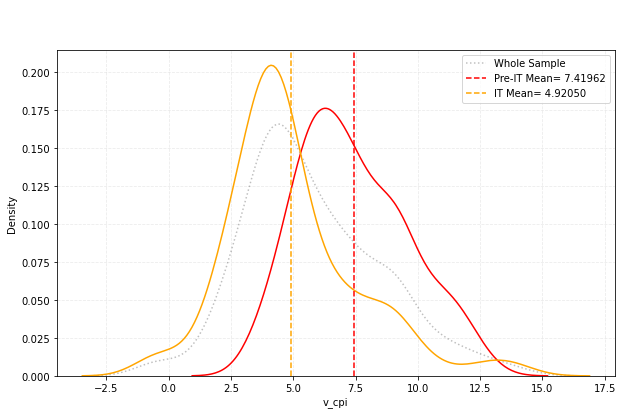

In [10]:
# Bootstrap Means histogram
plt.figure(figsize = (10, 6))
plt.suptitle('  ')
# sns.histplot(boot_means, bins=25, alpha=0.75)
sns.kdeplot(df_m.v_cpi, label='Whole Sample', color='k',linestyle = ':', alpha=0.25)
sns.kdeplot(pre_df.v_cpi, color='r')
sns.kdeplot(it_df.v_cpi, color='orange')
# plt.axvline(mean_all, color = 'k', linestyle = ':', label='Sample Mean= {:.5f}'.format(mean_all))
plt.axvline(pre_mean, color = 'r', linestyle = '--', label='Pre-IT Mean= {:.5f}'.format(pre_mean))
plt.axvline(it_mean, color = 'orange', linestyle = '--', label='IT Mean= {:.5f}'.format(it_mean))
plt.legend()
plt.grid(alpha = 0.25, linestyle = '--')
plt.show()

In [11]:
# Test de diferencia de medias
from scipy import stats
t_check=stats.ttest_ind(pre_df.v_cpi[12:].values.tolist(),it_df.v_cpi[12:].values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)

pre_mean different from it_mean
Ttest_indResult(statistic=9.649352406576247, pvalue=2.3838902109458564e-19)


Inflation since 1947

In [12]:
inf1 = pd.read_csv('data/inflation.csv', delimiter=';')
inf1.index = pd.to_datetime(inf1.date, format='%d/%m/%Y')
inf1 = inf1.drop("date", axis = 1)
inf1['v_cpi'] = inf1['CPI'].pct_change(12)*100
inf1['vol_cpi1'] = inf1['CPI'].rolling(12).std()
inf1.dropna(inplace=True)
inf1.head()

,CPI,target,v_cpi,vol_cpi1
date,,,,
1991-01-01,22.52,15.0,60.627675,2.675978
1991-02-01,22.44,15.0,57.473684,2.720473
1991-03-01,22.47,15.0,53.065395,2.648030
1991-04-01,22.77,15.0,49.409449,2.520100
1991-05-01,23.02,15.0,42.538700,2.392220


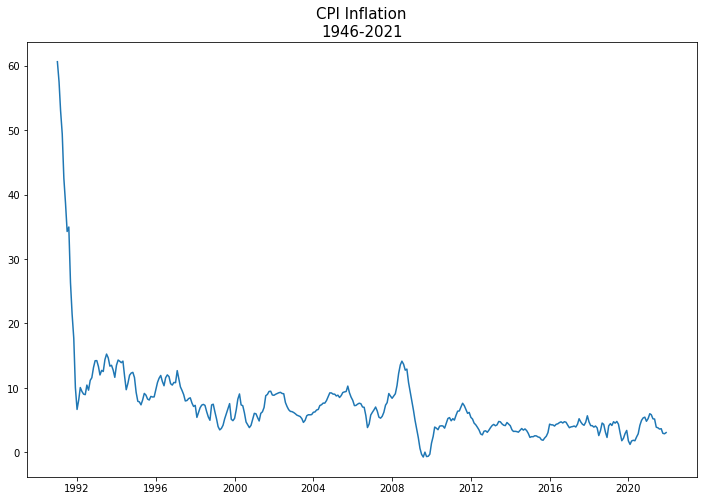

In [13]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation\n1946-2021', fontsize=15)
plt.plot(inf1.v_cpi, label='CPI Inflation')
# plt.plot(inf1.vol_cpi1,linestyle='--', label='12-month rolling mean')

In [14]:
simdf = inf1.loc['1992-01-01':'2021-12-01']
simdf['desv_tar'] = simdf.v_cpi - simdf.target
simdf['desv_tar_sd'] = simdf.desv_tar.rolling(12).std()
predf = simdf.loc['1992-01-01':'2004-12-01']
itdf  = simdf.loc['2005-01-01':'2021-12-01']


c:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
simdf.tail()

,CPI,target,v_cpi,vol_cpi1,desv_tar,desv_tar_sd
date,,,,,,
2021-08-01,151.33,4.0,3.615200,1.429622,-0.384800,0.779375
2021-09-01,151.65,4.0,3.671042,1.191707,-0.328958,0.862090
2021-10-01,152.20,4.0,2.956098,1.193511,-1.043902,1.000007
2021-11-01,152.94,4.0,2.885974,1.325007,-1.114026,1.081137
2021-12-01,153.20,4.0,3.067815,1.380425,-0.932185,1.139858


In [16]:
# inflation means
mean_all = simdf.v_cpi.mean()
vol_all = simdf.vol_cpi1.mean()
vol_desv = simdf.desv_tar_sd.mean()
median_all = simdf.v_cpi.median()
pre_mean = predf.v_cpi.mean()
pre_vol = predf.vol_cpi1.mean()
vol_desv_pre = predf.desv_tar_sd.mean()
it_mean = itdf.v_cpi.mean()
it_vol = itdf.vol_cpi1.mean()
vol_desv_it = itdf.desv_tar_sd.mean()
print('1991 - 2021:', mean_all, vol_all, vol_desv)
print('1991 - 2004:', pre_mean, pre_vol, vol_desv_pre)
print('2005 - 2021:', it_mean, it_vol, vol_desv_it)

1991 - 2021: 6.498818873110218 1.352286921666828 1.2075497531492951
1991 - 2004: 8.56282710376714 1.048318550025215 1.2921578603656458
2005 - 2021: 4.92045963790199 1.5847333235104137 1.14741163772591


In [17]:
# pd.to_datetime(df_m.index[20])
x0 = (simdf.index.get_loc('1992-01-01'))/len(simdf.index)
x1 = (simdf.index.get_loc('2004-12-01'))/len(simdf.index)
x2 = (simdf.index.get_loc('2005-01-01'))/len(simdf.index)
x3 = (simdf.index.get_loc('2021-12-01'))/len(simdf.index)

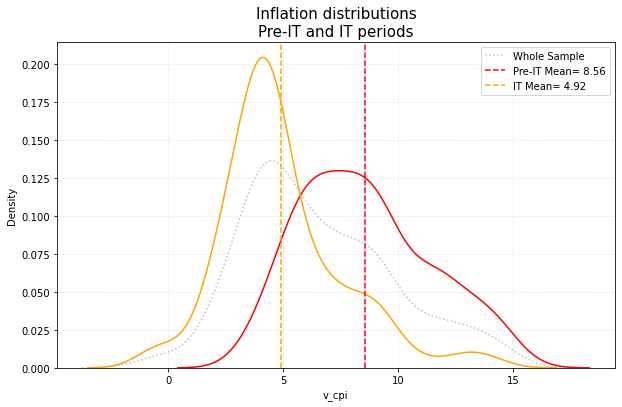

In [18]:
# histogram
plt.figure(figsize = (10, 6))
plt.title('Inflation distributions\nPre-IT and IT periods', fontsize=15)
sns.kdeplot(simdf.v_cpi, label='Whole Sample', color='k',linestyle = ':', alpha=0.25)
sns.kdeplot(predf.v_cpi, color='r')
sns.kdeplot(itdf.v_cpi, color='orange')
# plt.axvline(mean_all, color = 'k', linestyle = ':', label='Sample Mean= {:.5f}'.format(mean_all))
plt.axvline(pre_mean, color = 'r', linestyle = '--', label='Pre-IT Mean= {:.2f}'.format(pre_mean))
plt.axvline(it_mean, color = 'orange', linestyle = '--', label='IT Mean= {:.2f}'.format(it_mean))
plt.legend()
plt.grid(alpha = 0.25, linestyle = '--')
plt.show()

In [19]:
# Test de diferencia de medias Inflacion
from scipy import stats
t_check=stats.ttest_ind(predf.v_cpi.values.tolist(),itdf.v_cpi.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)

pre_mean different from it_mean
Ttest_indResult(statistic=12.603637985494625, pvalue=2.1417210180767207e-30)


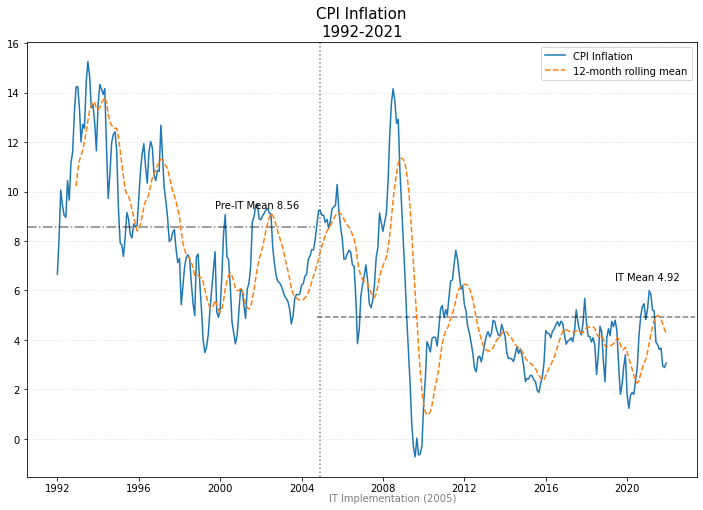

In [20]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation\n1992-2021', fontsize=15)
plt.plot(simdf.v_cpi, label='CPI Inflation')
# plt.ylim([-1.5, 25]) 
# plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=pre_mean, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=it_mean, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2004-12-01'), color='k', linestyle=':', alpha=0.5)
plt.plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),-2.5, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1999-10-01'),pre_mean+0.75, 'Pre-IT Mean {:.2f}'.format(pre_mean), fontsize=10)
plt.text(pd.to_datetime('2019-06-01'),it_mean+1.5, 'IT Mean {:.2f}'.format(it_mean), fontsize=10)
# plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

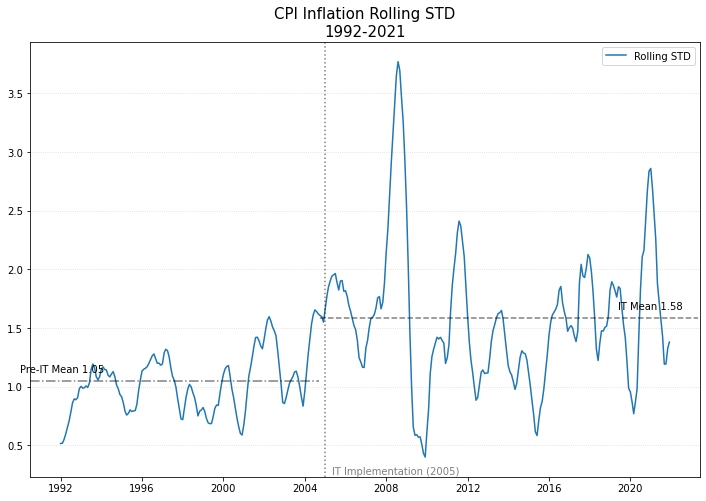

In [21]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation Rolling STD\n1992-2021', fontsize=15)
plt.plot(simdf.vol_cpi1, label='Rolling STD')
# plt.ylim([-1.5, 25]) 
# plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=pre_vol, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=it_vol, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2005-01-01'), color='k', linestyle=':', alpha=0.5)
# plt.plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),0.25, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1990-01-01'),pre_vol+0.075, 'Pre-IT Mean {:.2f}'.format(pre_vol), fontsize=10)
plt.text(pd.to_datetime('2019-06-01'),it_vol+0.075, 'IT Mean {:.2f}'.format(it_vol), fontsize=10)
# plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

In [22]:
# Test de diferencia de medias std
from scipy import stats
t_check=stats.ttest_ind(predf.vol_cpi1.values.tolist(),itdf.vol_cpi1.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)

pre_mean different from it_mean
Ttest_indResult(statistic=-10.30523162149367, pvalue=5.574730062906217e-22)


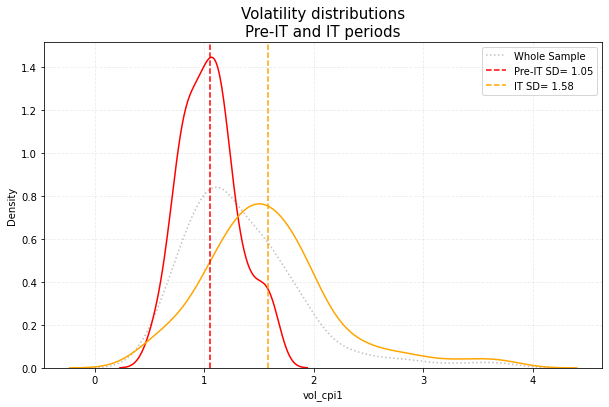

In [23]:
# histogram
plt.figure(figsize = (10, 6))
plt.title('Volatility distributions\nPre-IT and IT periods', fontsize=15)
sns.kdeplot(simdf.vol_cpi1, label='Whole Sample', color='k',linestyle = ':', alpha=0.25)
sns.kdeplot(predf.vol_cpi1, color='r')
sns.kdeplot(itdf.vol_cpi1, color='orange')
# plt.axvline(mean_all, color = 'k', linestyle = ':', label='Sample Mean= {:.5f}'.format(mean_all))
plt.axvline(pre_vol, color = 'r', linestyle = '--', label='Pre-IT SD= {:.2f}'.format(pre_vol))
plt.axvline(it_vol, color = 'orange', linestyle = '--', label='IT SD= {:.2f}'.format(it_vol))
plt.legend()
plt.grid(alpha = 0.25, linestyle = '--')
plt.show()

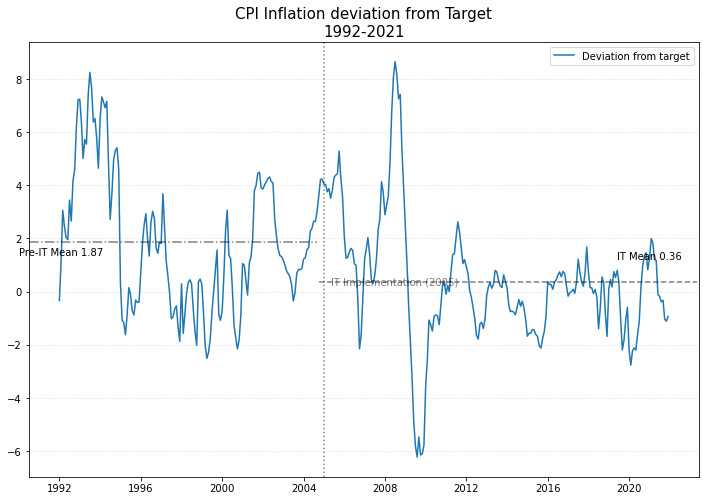

In [24]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation deviation from Target\n1992-2021', fontsize=15)
plt.plot(simdf.desv_tar, label='Deviation from target')
# plt.ylim([-1.5, 25]) 
# plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=np.mean(predf.desv_tar), color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=np.mean(itdf.desv_tar), color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2005-01-01'), color='k', linestyle=':', alpha=0.5)
# plt.plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),0.25, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1990-01-01'),vol_desv_pre+0.075, 'Pre-IT Mean {:.2f}'.format(np.mean(predf.desv_tar)), fontsize=10)
plt.text(pd.to_datetime('2019-06-01'),vol_desv_it+0.075, 'IT Mean {:.2f}'.format(np.mean(itdf.desv_tar)), fontsize=10)
# plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

In [25]:
# Test de diferencia de medias std
from scipy import stats
t_check=stats.ttest_ind(predf.desv_tar.values.tolist(),itdf.desv_tar.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)
else:
    print('pre_mean equal to it_mean')
    print(t_check)

pre_mean different from it_mean
Ttest_indResult(statistic=5.754566171712784, pvalue=1.8672484766508958e-08)


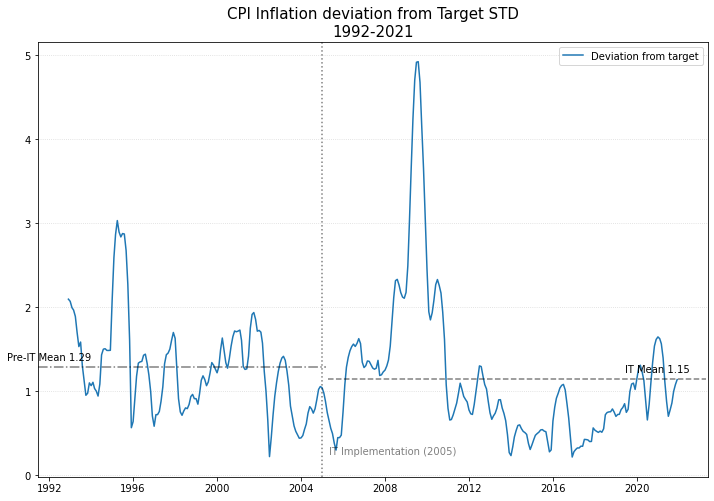

In [26]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation deviation from Target STD\n1992-2021', fontsize=15)
plt.plot(simdf.desv_tar_sd, label='Deviation from target')
# plt.ylim([-1.5, 25]) 
# plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=vol_desv_pre, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=vol_desv_it, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2005-01-01'), color='k', linestyle=':', alpha=0.5)
# plt.plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),0.25, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1990-01-01'),vol_desv_pre+0.075, 'Pre-IT Mean {:.2f}'.format(vol_desv_pre), fontsize=10)
plt.text(pd.to_datetime('2019-06-01'),vol_desv_it+0.075, 'IT Mean {:.2f}'.format(vol_desv_it), fontsize=10)
# plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

In [27]:
# Test de diferencia de medias std
from scipy import stats
t_check=stats.ttest_ind(predf.desv_tar_sd.values.tolist(),itdf.desv_tar_sd.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)
else:
    print('pre_mean equal to it_mean')
    print(t_check)

pre_mean equal to it_mean
Ttest_indResult(statistic=nan, pvalue=nan)


Inflation and output bivariate dist

In [28]:
df2 = df_m[['v_cpi', 'v_cpi_core', 'output']].loc['2005-01-01':'2021-12-01']
df2.head()

,v_cpi,v_cpi_core,output
month,,,
2005-01-01,9.039049,6.576911,4.569182
2005-02-01,9.036529,6.303122,4.723211
2005-03-01,8.766234,6.257268,4.745896
2005-04-01,8.877511,6.371430,4.613652
2005-05-01,8.523438,6.514611,4.256714


In [29]:
print(np.mean(df2.v_cpi), np.mean(df2.v_cpi_core), np.mean(df2.output))
print(np.min(df2.v_cpi), np.min(df2.v_cpi_core), np.min(df2.output))
print(np.max(df2.v_cpi), np.max(df2.v_cpi_core), np.max(df2.output))

4.920504917193716 3.870882287049019 3.6035848594942057
-0.732240433349507 0.84 -7.347887775836359
14.155852292778913 9.43 14.033387119278885


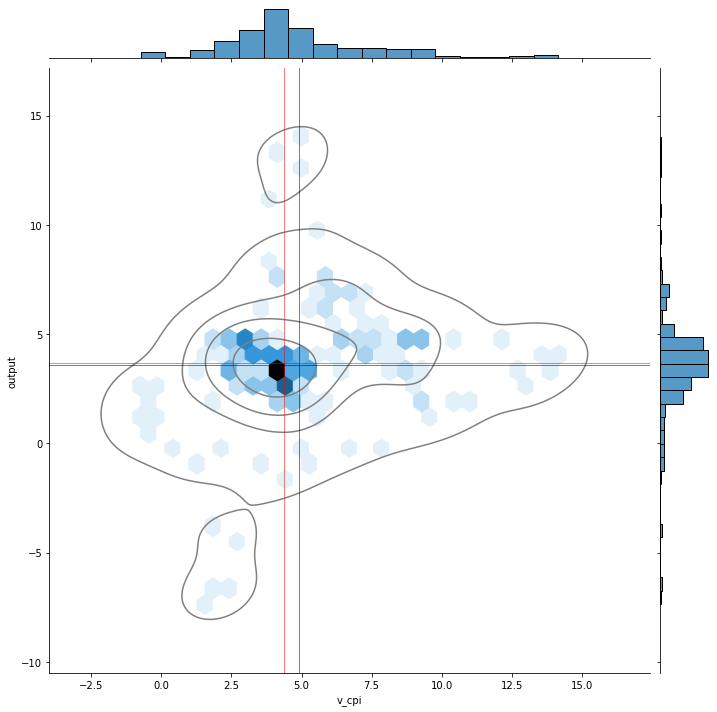

In [30]:
g = sns.jointplot(data=df2, x="v_cpi", y="output", kind="hex", height=10, ratio=10)
g.plot_joint(sns.kdeplot, color="grey", zorder=1, levels=5)
# plt.figure(figsize=(12,8))
plt.axhline(y=np.mean(df2.output), color="black", lw=1, alpha=0.5)
plt.axvline(np.mean(df2.v_cpi), color="black", lw=1, alpha=0.5)
plt.axhline(y=np.median(df2.output), color="r", lw=1, alpha=0.5)
plt.axvline(np.median(df2.v_cpi), color="r", lw=1, alpha=0.5)
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

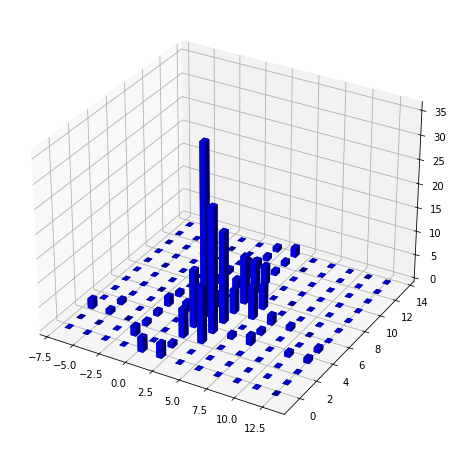

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(df2.v_cpi, df2.output, bins=12, range=[[-1, 14], [-7, 14]])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(ypos,xpos, zpos, dx, dy, dz, color='b', zsort='average')
# ax.plot_surface(xpos, ypos, zpos, alpha=0.1)

plt.show()

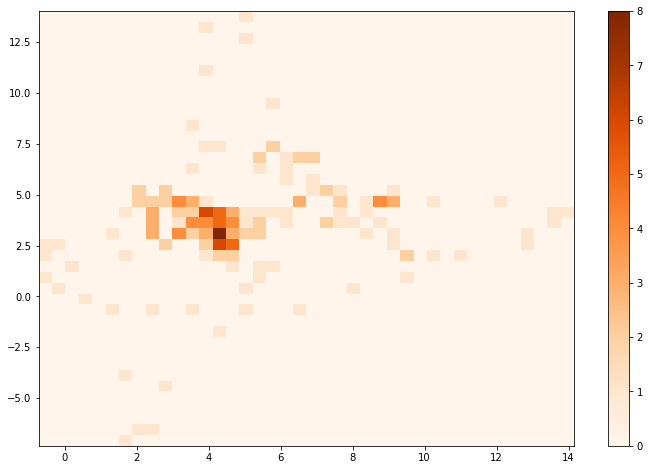

In [57]:
plt.figure(figsize=(12,8))
h =plt.hist2d(df2.v_cpi, df2.output, bins=(40, 40),cmap=plt.cm.Oranges)#, cmap=plt.cm.jet)
plt.colorbar(h[3])

Bivariate distribution assuming normal distributions (CHECK FOR DISTRIBUTION)

c:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


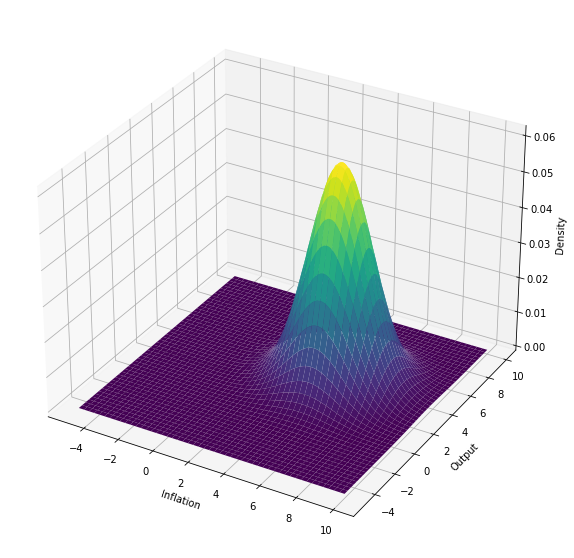

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#df2.v_cpi, df2.output
#Parameters to set
mu_x = np.mean(df2.v_cpi)
variance_x = np.std(df2.v_cpi)

mu_y = np.mean(df2.output)
variance_y = np.std(df2.output)

#Create grid and multivariate normal
x = np.linspace(-5,10,500)
y = np.linspace(-5,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('Inflation')
ax.set_ylabel('Output')
ax.set_zlabel('Density')
plt.show()

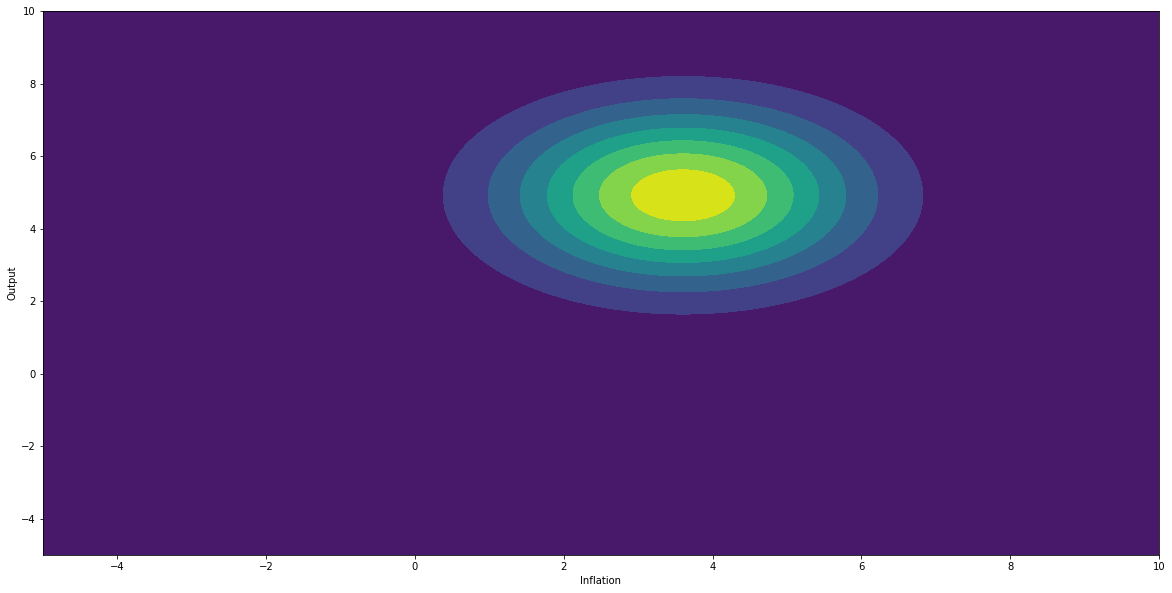

In [81]:
#Make a 3D plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.contourf(Y, X, rv.pdf(pos),cmap='viridis')#linewidth=0)
ax.set_xlabel('Inflation')
ax.set_ylabel('Output')
# ax.set_zlabel('Density')
plt.show()